In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=250, validation_data=(x_test, y_test))
!clear

Epoch 1/250
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8843 - accuracy: 0.3214 - val_loss: 1.7816 - val_accuracy: 0.3629
Epoch 2/250
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7568 - accuracy: 0.3707 - val_loss: 1.7281 - val_accuracy: 0.3882
Epoch 3/250
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7149 - accuracy: 0.3873 - val_loss: 1.7411 - val_accuracy: 0.3759
Epoch 4/250
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6864 - accuracy: 0.3966 - val_loss: 1.6712 - val_accuracy: 0.3955
Epoch 5/250
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6687 - accuracy: 0.4025 - val_loss: 1.6626 - val_accuracy: 0.4092
Epoch 6/250
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6489 - accuracy: 0.4126 - val_loss: 1.6365 - val_accuracy: 0.4098
Epoch 7/250
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6360 - accuracy: 0.4132 - val_loss: 1.6599 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 [==============================] - 1s 2ms/step - loss: 1.6109 - accuracy: 0.4382
Test accuracy: 0.4382


In [ ]:
plt.figure(figsize=(19, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


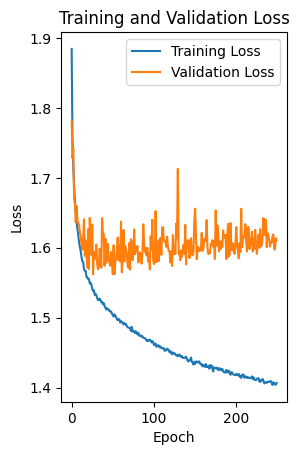

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


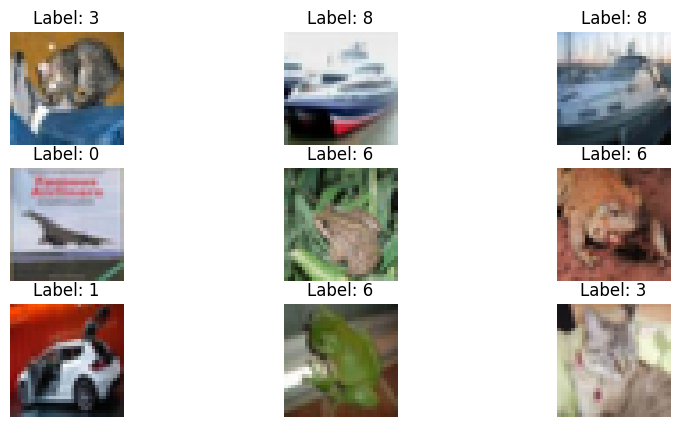

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='viridis')
    plt.title(f'Label: {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 48ms/step


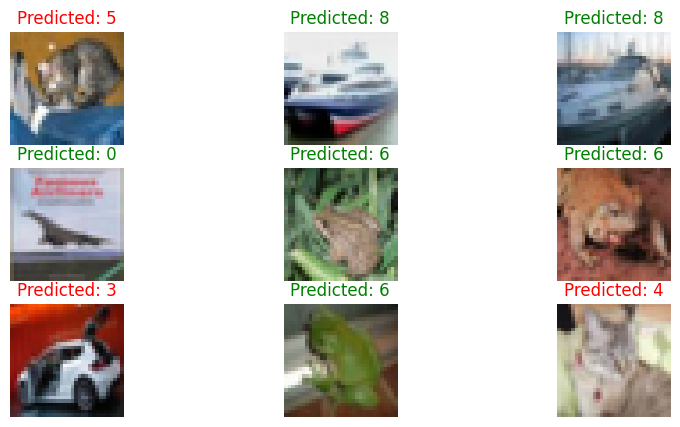

In [ ]:
plt.figure(figsize=(10, 5))
predictions = model.predict(x_test[:9])
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='viridis')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title(f'Predicted: {predicted_label}', color=color)
    plt.axis('off')
plt.show()